# Phase Portrait
Non-Linear and Adaptive Control System assignment

Raisal P Wardana (@IEatCodeDaily)\
13319072

### Imports

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML

### Functions

In [10]:
#Draw Phase portrait
def PhasePortrait(df, axes:int(2), resolution = 60, ax=None):
    #Phase Portrait
    
    if ax is None:
        fig,ax = plt.subplots()
    else:
        fig = None
    
    #Create meshgrid for XY
    X,Y = np.meshgrid(np.linspace(axes[0], axes[1], resolution), np.linspace(axes[0], axes[1],  resolution))
    #Calculate vector field
    U,V = df(X,Y)
    hue = np.zeros([resolution,resolution])
    for i in range(resolution):
        for j in range(resolution):
            hue[i][j] = np.linalg.norm([U[i][j],V[i][j]])

    ax.streamplot(X, Y, U, V, color=hue,linewidth=0.5, density=2, cmap=plt.get_cmap('rainbow') )
    
    return fig, ax

#Create trajectory array for phase portrait
def trajectory(df, start:int(2), iterations = 100000, dt = 0.01):
    x_s = start[0]
    y_s = start[1]
    x = [x_s]
    y = [y_s]
    i=0
    while i < iterations:
        u,v = df(x_s,y_s)
        x_e = x_s + u*dt
        y_e = y_s + v*dt
        x.append(x_e)
        y.append(y_e)
        x_s = x_e
        y_s = y_e
        i+=1
        if np.linalg.norm([u,v]) <= 0.001:
            break
        
    return x,y,i


# Pendulum with Friction

### Model

In [40]:
# Constants
g = 9.806   #gravitation (m/s^2)
k = 0.7     #friction
m = 1       #mass (kg)
l = 7       #pole length (m)

# Title
title = "Pendulum with Friction"

In [41]:
def df(x, x1):
    return x1, -(g/l)*np.sin(x) - (k/m)*x1

def func_Pendulum(x,t):
  theta, omega = x
  
  df1 = omega
  df2 = -(g/l)*np.sin(theta)-(k/m)*omega

  return df1, df2

Text(0.5, 0, 'Time (s)')

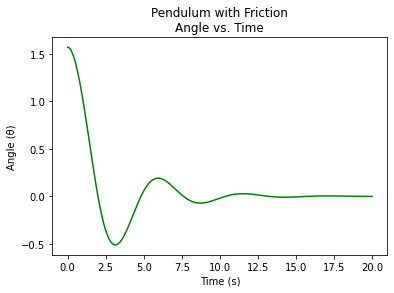

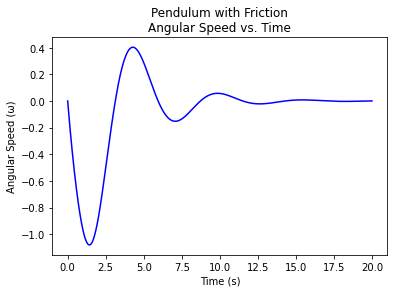

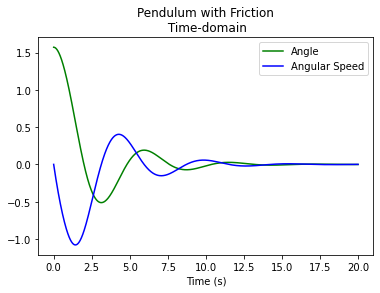

In [42]:
#=======Initialize conditions========
# initial position
theta_0 = np.pi/2     #angular position (rad)
omega_0 = 0         #angular velocity (rad/s)

# time range
t_0 = 0     #initial time (s)
t_max = 20  #final time (s)
dt = 0.01   #time step (s)
t = np.linspace(t_0,t_max, int(1/dt*(t_max-t_0)))   #time array

#=======Solve ODE========
solution = odeint(func_Pendulum, [theta_0, omega_0], t)   #solve ODE

theta = solution[:,0]
omega = solution[:,1]

#Draw Plot
plt.ion()
fig1 = plt.figure()
plt.title(f"{title}\nAngle vs. Time")
plt.plot(t, theta, color = "g")
plt.xlabel("Time (s)")
plt.ylabel("Angle (θ)")

fig2 = plt.figure()
plt.title(f"{title}\nAngular Speed vs. Time")
plt.plot(t, omega, color = "b")
plt.xlabel("Time (s)")
plt.ylabel("Angular Speed (ω)")

fig3 = plt.figure()
plt.title(f"{title}\n Time-domain")
plt.plot(t, theta, color = "g", label = "Angle")
plt.plot(t, omega, color = "b", label = "Angular Speed")
plt.legend()
plt.xlabel("Time (s)")

### Phase Portrait

#### Draw Graph
statically draw phase portrait and trajectory

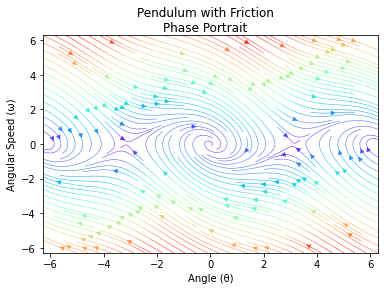

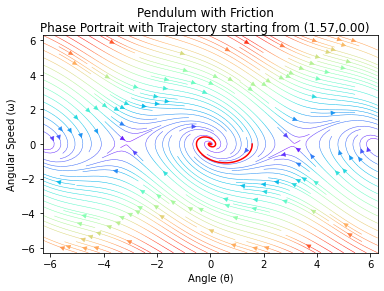

In [14]:
#Draw Phase Portrait and Trajectory

#where to start trajectory from
start = [theta_0, omega_0] #x,y
iterations = 10000

#Phase Portrait
fig, ax = plt.subplots()
PhasePortrait(df, [-2*np.pi,2*np.pi], ax = ax)
fig.suptitle(f'{title}\nPhase Portrait')
ax.set_xlabel('Angle (θ)')
ax.set_ylabel('Angular Speed (ω)')
plt.show()

#Trajectory
fig, ax = plt.subplots()
PhasePortrait(df, [-2*np.pi,2*np.pi], ax = ax)
x,y,iterations = trajectory(df, start, iterations=iterations)
ax1 = ax.plot(x,y, color='r')
fig.suptitle(f'{title}\nPhase Portrait with Trajectory starting from ({start[0]:.2f},{start[1]:.2f})')
ax.set_xlabel('Angle (θ)')
ax.set_ylabel('Angular Speed (ω)')
plt.show()

#### Analysis
Based on phase portrait above, the system is a stable focus system.

## Inverted Pendulum - Cartpole problem

In [182]:
# Constants
g = 9.806   #gravitation (m/s^2)
k = 0.2     #friction
M = 6       #cart mass (kg)
m = 0.2       #pendulum mass (kg)
l = 0.3       #pole length (m)

# Title
title = "Inverted Pendulum"

In [183]:
def df_cartpole(x, x1, theta, theta1):
  I = 1/3*m*l**2
  return x1, (1/(M+m))*(m*l*theta1**2*np.sin(theta) - m*g*np.sin(theta)*np.cos(theta) - k*x1), theta1, (1/I)*(m*l*theta1**2*np.sin(theta)*np.cos(theta) + (M+m)*g*np.sin(theta) - k*theta1*np.cos(theta))

def func_cartpole(state,t):
  x, x1, theta, theta1 = state
  I = 1/3*m*l**2
  denom = 13*(M+m) - 12*m*np.cos(theta)**2
  
  v = x1
  a = (13*m*l*theta1**2*np.sin(theta) - 12*m*g*np.sin(theta)*np.cos(theta) - 12*k*x1)/denom
  omega = theta1
  alpha = (-12*(m*l*theta1**2*np.sin(theta)*np.cos(theta) + m*g*np.sin(theta)) + M*g*np.sin(theta)-(k/m)*theta1)/(l*denom)
  
  return v, a, omega, alpha

Text(0.5, 0, 'Time (s)')

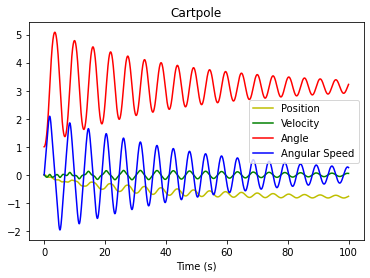

In [186]:
#=======Initialize conditions========
# initial position
x_0 = 0             #cart position (m)
v_0 = 0            #cart velocity (m/s)
theta_0 = 1    #angular position (rad)
omega_0 = 0          #angular velocity (rad/s)

# time range
t_0 = 0     #initial time (s)
t_max = 100  #final time (s)
dt = 0.01   #time step (s)
t = np.linspace(t_0,t_max, int(1/dt*(t_max-t_0)))   #time array

#=======Solve ODE========
solution = odeint(func_cartpole, [x_0, v_0, theta_0, omega_0], t)   #solve ODE

x = solution[:,0]
v = solution[:,1]
theta = solution[:,2]
omega = solution[:,3]

# Gambar plot hasil
plt.ion()

fig1 = plt.figure()
plt.title("Cartpole")
plt.plot(t, x, '-y', label = "Position")
plt.plot(t, v, '-g', label = "Velocity")
plt.plot(t, theta, '-r', label = "Angle")
plt.plot(t, omega, '-b', label = "Angular Speed")

plt.legend()
plt.xlabel("Time (s)")


### Phase Portrait

#### Draw Graph
statically draw phase portrait and trajectory

TypeError: df_cartpole() missing 2 required positional arguments: 'theta' and 'theta1'

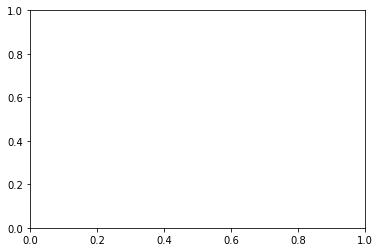

In [174]:
#Draw Phase Portrait and Trajectory

#where to start trajectory from
start = [x_0, v_0, theta_0, omega_0] #x,y
iterations = 10000

#Phase Portrait
fig, ax = plt.subplots()
PhasePortrait(df_cartpole, [-2*np.pi,2*np.pi], ax = ax)
fig.suptitle(f'{title}\nPhase Portrait')
ax.set_xlabel('Angle (θ)')
ax.set_ylabel('Angular Speed (ω)')
plt.show()

#Trajectory
fig, ax = plt.subplots()
PhasePortrait(df, [-2*np.pi,2*np.pi], ax = ax)
x,y,iterations = trajectory(df_cartpole(), start, iterations=iterations)
ax1 = ax.plot(x,y, color='r')
fig.suptitle(f'{title}\nPhase Portrait with Trajectory starting from ({start[0]:.2f},{start[1]:.2f})')
ax.set_xlabel('Angle (θ)')
ax.set_ylabel('Angular Speed (ω)')
plt.show()